In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# t-SNE
### 테스트 데이터에는 적용이 불가능, 훈련 데이터에만 적용 가능하다.
### 주 목적이 시각화이다.

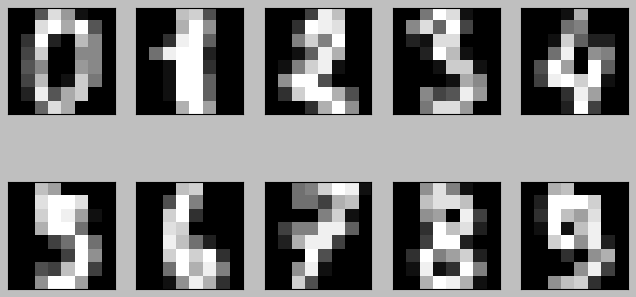

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5),
                         subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images) :
    ax.imshow(img, cmap= 'gray', interpolation='none')

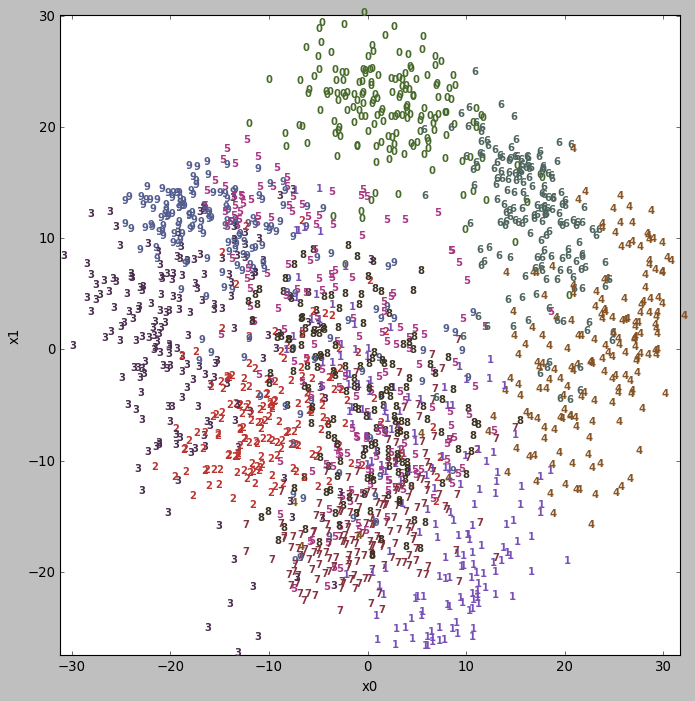

In [18]:
# PCA를 사용한 경우 0,4,6 은 비교적 잘 분리되었으나 나머지 숫자들은 겹친 부분이 많다.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', "#BD3430", "#4A2D4E", '#875525',
          '#A83683', '#4E655E', "#853541", "#3A3120", '#535D8E']

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), 
             color = colors[digits.target[i]], fontdict={'weight':"bold", 'size':9})
plt.xlabel("x0")
plt.ylabel('x1')
plt.show()
    

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

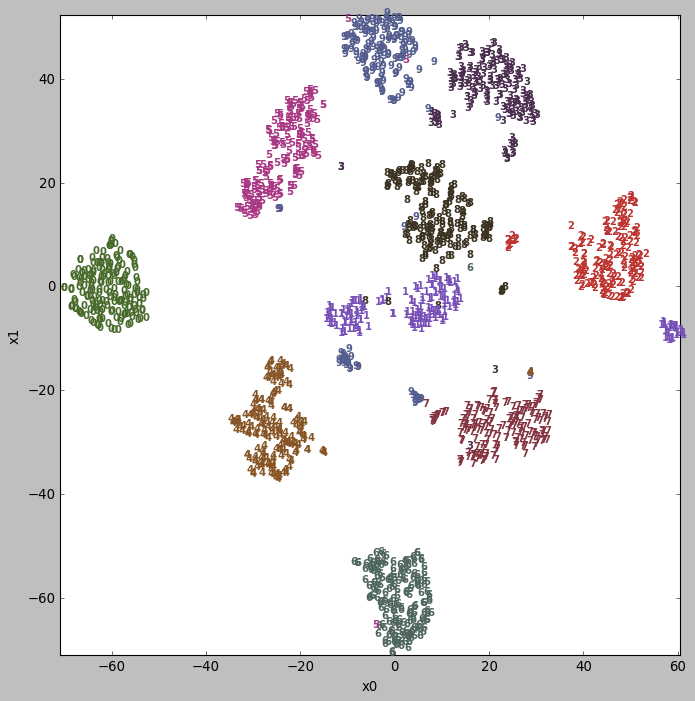

In [22]:
#t-SNE로 분류하면 아주 잘 분류된다.

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max())
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]), 
             color = colors[digits.target[i]], fontdict={'weight':"bold", 'size':9})
plt.xlabel("x0")
plt.ylabel('x1')
plt.show()